In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fund= pd.read_csv('Fun.csv')
sprtn=pd.read_csv('SPRTN.csv')
mthret=pd.read_csv('Mthret.csv')
sprtn['datadate']=sprtn['caldt']
mthret['TICKER']=mthret['tic']
fund['datadate']=fund['public_date']
fmerge=sprtn.merge(mthret, on = "datadate", how = "left") 
fmerge.dropna(inplace=True)
dfmerge = pd.merge(fmerge, fund, on=['datadate', 'TICKER'])
dfmerge.dropna(inplace=True)
dfmerge.info()
dfmerge.reset_index()

<class 'pandas.core.frame.DataFrame'>
Index: 16638 entries, 0 to 22422
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   caldt        16638 non-null  object 
 1   sprtrn       16638 non-null  float64
 2   datadate     16638 non-null  object 
 3   gvkey_x      16638 non-null  float64
 4   indfmt       16638 non-null  object 
 5   consol       16638 non-null  object 
 6   popsrc       16638 non-null  object 
 7   datafmt      16638 non-null  object 
 8   tic          16638 non-null  object 
 9   curcd        16638 non-null  object 
 10  costat       16638 non-null  object 
 11  LINKTYPE     16638 non-null  object 
 12  LPERMNO      16638 non-null  float64
 13  MthCalDt     16638 non-null  object 
 14  MthRet       16638 non-null  float64
 15  TICKER       16638 non-null  object 
 16  gvkey_y      16638 non-null  int64  
 17  adate        16638 non-null  object 
 18  qdate        16638 non-null  object 
 19  public_da

,index,caldt,sprtrn,datadate,gvkey_x,indfmt,consol,popsrc,datafmt,tic,...,adate,qdate,public_date,gpm,cfm,roe,debt_ebitda,inv_turn,rect_turn,pay_turn
0,0,2000-01-31,-0.050904,2000-01-31,1820.0,INDL,C,D,STD,ALOT,...,1999-01-31,1999-10-31,2000-01-31,0.431,0.042,0.017,0.130,2.334,5.546,6.593
1,1,2000-01-31,-0.050904,2000-01-31,1864.0,INDL,C,D,STD,REX,...,1998-12-31,1999-09-30,2000-01-31,0.275,-0.010,-0.101,-41.160,24.202,3.870,6.335
2,2,2000-01-31,-0.050904,2000-01-31,1878.0,INDL,C,D,STD,ADSK,...,1999-01-31,1999-10-31,2000-01-31,0.899,0.115,0.014,0.000,4.291,6.873,2.516
3,3,2000-01-31,-0.050904,2000-01-31,2436.0,INDL,C,D,STD,CAL,...,1998-12-31,1999-09-30,2000-01-31,0.127,0.087,0.224,2.840,37.488,16.176,9.159
4,5,2000-01-31,-0.050904,2000-01-31,3164.0,INDL,C,D,STD,CNJ,...,1999-01-31,1999-10-31,2000-01-31,0.650,0.030,-0.043,3.961,2.877,17.918,5.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,22416,2010-12-31,0.065300,2010-12-31,264416.0,INDL,C,D,STD,UCTT,...,2009-12-31,2010-09-30,2010-12-31,0.139,0.053,0.290,0.722,6.116,9.171,7.557
16634,22417,2010-12-31,0.065300,2010-12-31,264418.0,INDL,C,D,STD,FCTY,...,2009-12-31,2010-09-30,2010-12-31,0.568,-0.233,-0.065,17.045,87.297,0.071,0.025
16635,22418,2010-12-31,0.065300,2010-12-31,264708.0,INDL,C,D,STD,CAB,...,2009-12-31,2010-09-30,2010-12-31,0.405,0.048,0.064,9.867,3.275,1.517,5.081
16636,22420,2010-12-31,0.065300,2010-12-31,266216.0,INDL,C,D,STD,ACFC,...,2009-12-31,2010-09-30,2010-12-31,0.143,-0.321,-0.319,-55.282,1.608,0.084,0.159


In [3]:
#tickers like REX dont have values in 08 making the data set in train and test uneven

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split into training and testing datasets
# Calculate Z-scores    --- check the standardization calculations
dfmerge.loc[:, 'gpm_Z'] = dfmerge.groupby('datadate')['gpm'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'cfm_Z'] = dfmerge.groupby('datadate')['cfm'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'roe_Z'] = dfmerge.groupby('datadate')['roe'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'debt_ebitda_Z'] = dfmerge.groupby('datadate')['debt_ebitda'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'inv_turn_Z'] = dfmerge.groupby('datadate')['inv_turn'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'rect_turn_Z'] = dfmerge.groupby('datadate')['rect_turn'].transform(lambda x: (x - x.mean()) / x.std())
dfmerge.loc[:, 'pay_turn_Z'] = dfmerge.groupby('datadate')['pay_turn'].transform(lambda x: (x - x.mean()) / x.std())

#dfmerge.to_excel("outputdataset.xlsx", index=False)

In [24]:
# Split into training and testing datasets
#train_df = dfmerge[dfmerge['datadate'] < '2008-01-01'].copy()
#test_df = dfmerge[dfmerge['datadate'] >= '2008-01-01'].copy()


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X = dfmerge[['gpm_Z', 'cfm_Z', 'roe_Z', 'debt_ebitda_Z', 'inv_turn_Z', 'rect_turn_Z', 'pay_turn_Z','sprtrn']]
y= dfmerge['MthRet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.020516550848755477
R^2 Score: 0.07695343817592493


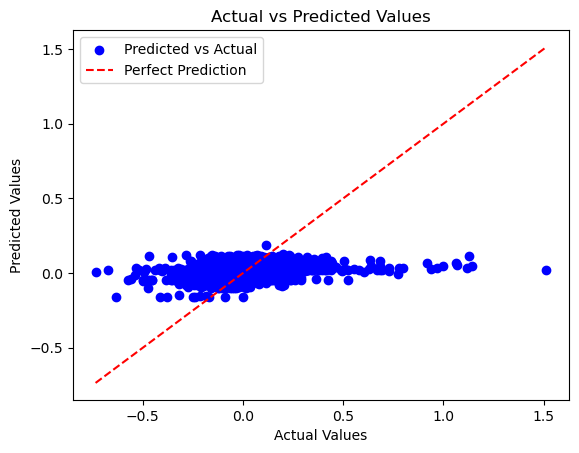

In [22]:
#add ticker and time - financial leverage

import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions
# X_test, y_test, and y_pred are already defined

# Create a scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [16]:
diff=y_test-y_pred
diff.sum()

-4.318686555520615

In [5]:
import pandas as pd
import statsmodels.api as sm


dfmerge['datadate'] = pd.to_datetime(dfmerge['datadate'])

# Extract year from date
dfmerge['year'] = dfmerge['datadate'].dt.year

# Initialize an empty DataFrame to store beta coefficients
beta_df = pd.DataFrame(columns=['ticker', 'year', 'beta'])

# Loop through each ticker and year
for ticker in dfmerge['TICKER'].unique():
    for year in dfmerge['year'].unique():
        # Filter data for the specific ticker and year
        subset = dfmerge[(dfmerge['TICKER'] == ticker) & (dfmerge['year'] == year)]
        
        if len(subset) > 1:  # Ensure there is enough data to perform regression
            X = subset['sprtrn']
            y = subset['MthRet']
            
            # Add a constant to the independent variable
            X = sm.add_constant(X)
            
            # Perform the regression
            model = sm.OLS(y, X).fit()
            
            # Extract the beta coefficient
            beta = model.params['sprtrn']
            
            # Append the result to the beta_df
            beta_df = pd.concat([beta_df, pd.DataFrame([{'ticker': ticker, 'year': year, 'beta': beta}])], ignore_index=True)

# Display the resulting DataFrame
print(beta_df)

    ticker  year      beta
0     BSTC  2003 -0.110719
1      STZ  2000  2.840810
2      STZ  2001  0.607156
3      STZ  2002 -6.357965
4      STZ  2003  0.516084
..     ...   ...       ...
144    CMG  2009  4.208289
145  CENTA  2008 -0.940457
146  CENTA  2009 -0.538715
147  CENTA  2010  1.282167
148    MWA  2008  3.016097

[149 rows x 3 columns]


In [7]:
dfmerge['ticker']=dfmerge['TICKER']
merged_df = pd.merge(dfmerge, beta_df, on=['ticker', 'year'], how='left')

# Display the resulting DataFrame
print(merged_df)

            caldt    sprtrn   datadate   gvkey_x indfmt consol popsrc datafmt  \
0      2000-01-31 -0.050904 2000-01-31    1820.0   INDL      C      D     STD   
1      2000-01-31 -0.050904 2000-01-31    1864.0   INDL      C      D     STD   
2      2000-01-31 -0.050904 2000-01-31    1878.0   INDL      C      D     STD   
3      2000-01-31 -0.050904 2000-01-31    2436.0   INDL      C      D     STD   
4      2000-01-31 -0.050904 2000-01-31    3164.0   INDL      C      D     STD   
...           ...       ...        ...       ...    ...    ...    ...     ...   
16633  2010-12-31  0.065300 2010-12-31  264416.0   INDL      C      D     STD   
16634  2010-12-31  0.065300 2010-12-31  264418.0   INDL      C      D     STD   
16635  2010-12-31  0.065300 2010-12-31  264708.0   INDL      C      D     STD   
16636  2010-12-31  0.065300 2010-12-31  266216.0   INDL      C      D     STD   
16637  2010-12-31  0.065300 2010-12-31  271794.0   INDL      C      D     STD   

        tic curcd  ...     

In [21]:
merged_df.dropna(subset=['beta'], inplace=True)

In [22]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_df = merged_df[merged_df['datadate'] < '2009-01-01'].copy()
test_df = merged_df[merged_df['datadate'] >= '2009-01-01'].copy()

# Prepare the data for the linear regression model
X_train = train_df[['gpm_Z', 'cfm_Z', 'roe_Z', 'debt_ebitda_Z', 'inv_turn_Z', 'rect_turn_Z', 'pay_turn_Z']]
X_test = test_df[['gpm_Z', 'cfm_Z', 'roe_Z', 'debt_ebitda_Z', 'inv_turn_Z', 'rect_turn_Z', 'pay_turn_Z']]
y_train = train_df['beta']
y_test = test_df['beta']

# Split the data into training and testing sets (90-10 split)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Mean Squared Error: 1544.5539861241684
Intercept: -3.606886907151943
Coefficient: -2.7221678611787614


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: -0.1335775701101718


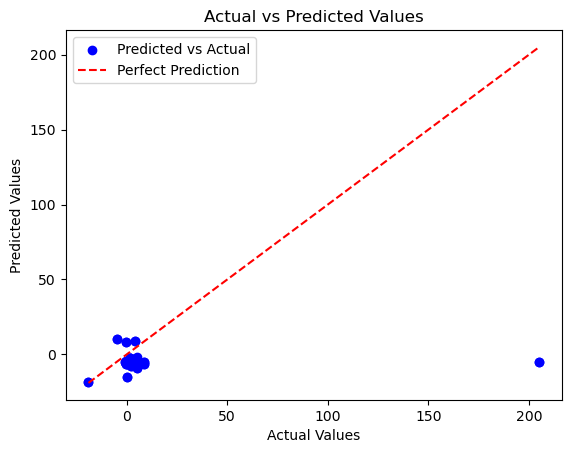

In [25]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions
# X_test, y_test, and y_pred are already defined

# Create a scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [26]:
y_test

12785     -0.581143
12786     -0.581143
12825     -0.148434
12826     -0.148434
12928    205.125000
12929    205.125000
13151     -0.538715
13152     -0.538715
13222     -0.014669
13223     -0.014669
13224      0.328516
13225      0.328516
13271      8.417956
13272      8.417956
13276      0.084013
13277      0.084013
13326     -0.123009
13327     -0.123009
13399      8.757329
13400      8.757329
13592      4.791599
13593      4.791599
13626     -0.917675
13627     -0.917675
14039     -4.725058
14040     -4.725058
14118      5.026026
14119      5.026026
14610      4.208289
14611      4.208289
14754      1.853009
14755      1.853009
14790      5.070039
14791      5.070039
14805      5.066574
14895      2.279091
14896      2.279091
15090      1.282167
15091      1.282167
15155    -19.024454
15156    -19.024454
15157      4.225328
15158      4.225328
15201      1.315766
15202      1.315766
15206      1.778859
15207      1.778859
15254      0.848369
15255      0.848369
15328      1.211340


In [27]:
test_df

,caldt,sprtrn,datadate,gvkey_x,indfmt,consol,popsrc,datafmt,tic,curcd,...,gpm_Z,cfm_Z,roe_Z,debt_ebitda_Z,inv_turn_Z,rect_turn_Z,pay_turn_Z,year,ticker,beta
12785,2009-03-31,0.085405,2009-03-31,8582.0,INDL,C,D,STD,SENEA,USD,...,-0.050939,0.146964,0.395564,0.065624,-0.228029,0.134057,-0.083795,2009,SENEA,-0.581143
12786,2009-03-31,0.085405,2009-03-31,8582.0,INDL,C,D,STD,SENEA,USD,...,-0.050939,0.146964,0.395564,0.065624,-0.228029,0.134057,-0.083795,2009,SENEA,-0.581143
12825,2009-03-31,0.085405,2009-03-31,25946.0,INDL,C,D,STD,SPCHA,USD,...,0.023149,0.120006,-1.073055,-0.210351,-0.210364,3.466514,-0.189217,2009,SPCHA,-0.148434
12826,2009-03-31,0.085405,2009-03-31,25946.0,INDL,C,D,STD,SPCHA,USD,...,0.023149,0.120006,-1.073055,-0.210351,-0.210364,3.466514,-0.189217,2009,SPCHA,-0.148434
12928,2009-06-30,0.000196,2009-06-30,7506.0,INDL,C,D,STD,MOLX,USD,...,-0.082066,0.421088,0.247841,-0.017773,-0.096507,-0.290940,-0.259265,2009,MOLX,205.125000
12929,2009-06-30,0.000196,2009-06-30,7506.0,INDL,C,D,STD,MOLX,USD,...,-0.082066,0.421088,0.247841,-0.017773,-0.096507,-0.290940,-0.259265,2009,MOLX,205.125000
13151,2009-09-30,0.035723,2009-09-30,25536.0,INDL,C,D,STD,CENTA,USD,...,0.084180,0.087863,0.427947,0.010969,-0.200455,-0.198480,-0.234651,2009,CENTA,-0.538715
13152,2009-09-30,0.035723,2009-09-30,25536.0,INDL,C,D,STD,CENTA,USD,...,0.084180,0.087863,0.427947,0.010969,-0.200455,-0.198480,-0.234651,2009,CENTA,-0.538715
13222,2009-11-30,0.057364,2009-11-30,6669.0,INDL,C,D,STD,LEN,USD,...,-1.100376,-1.759775,-1.322322,-1.850155,-0.421010,-0.105659,0.944370,2009,LEN,-0.014669
13223,2009-11-30,0.057364,2009-11-30,6669.0,INDL,C,D,STD,LEN,USD,...,-1.100376,-1.759775,-1.322322,-1.850155,-0.421010,-0.105659,0.944370,2009,LEN,-0.014669


In [31]:
y_test = np.delete(y_test,(4),axis=0)
y_test = np.delete(y_test,(5),axis=0)
y_pred = np.delete(y_pred,(4),axis=0)
y_pred = np.delete(y_pred,(5),axis=0)

y_test

array([-5.81142790e-01, -5.81142790e-01, -1.48433932e-01, -1.48433932e-01,
       -5.38714554e-01, -1.46694791e-02,  3.28516143e-01,  3.28516143e-01,
        8.41795622e+00,  8.41795622e+00,  8.40132801e-02,  8.40132801e-02,
       -1.23009397e-01, -1.23009397e-01,  8.75732936e+00,  8.75732936e+00,
        4.79159867e+00,  4.79159867e+00, -9.17674864e-01, -9.17674864e-01,
       -4.72505768e+00, -4.72505768e+00,  5.02602555e+00,  5.02602555e+00,
        4.20828879e+00,  4.20828879e+00,  1.85300871e+00,  1.85300871e+00,
        5.07003878e+00,  5.07003878e+00,  5.06657442e+00,  2.27909135e+00,
        2.27909135e+00,  1.28216697e+00,  1.28216697e+00, -1.90244541e+01,
       -1.90244541e+01,  4.22532751e+00,  4.22532751e+00,  1.31576570e+00,
        1.31576570e+00,  1.77885911e+00,  1.77885911e+00,  8.48369066e-01,
        8.48369066e-01,  1.21133997e+00,  1.21133997e+00,  4.21179173e-01,
        4.21179173e-01,  7.35467075e-01,  7.35467075e-01,  5.06657442e+00,
       -2.04984686e-01, -

In [38]:
y_pred = np.delete(y_pred,(4),axis=0)
y_pred = np.delete(y_pred,(5),axis=0)
y_pred

array([ -4.56435834,  -4.56435834,  -6.52953565,  -6.52953565,
        -5.86761309, -14.9844706 ,  -5.31164268,  -5.31164268,
        -4.98472324,  -4.98472324,  -6.4671904 ,  -6.4671904 ,
        -5.63596661,  -5.63596661,  -6.08609216,  -6.08609216,
        -5.57299898,  -5.57299898,  -5.3009721 ,  -5.3009721 ,
        10.25752972,  10.25752972,  -4.1162933 ,  -4.1162933 ,
         8.69718348,   8.69718348,  -2.44353305,  -2.44353305,
        -8.77248824,  -8.77248824,  -1.4478558 ,  -7.42632264,
        -7.42632264,  -6.18299351,  -6.18299351, -18.25783997,
       -18.25783997,  -5.92057812,  -5.92057812,  -5.3853418 ,
        -5.3853418 ,  -5.67757628,  -5.67757628,  -5.26013933,
        -5.26013933,  -5.13996654,  -5.13996654,  -5.13301509,
        -5.13301509,  -5.55003128,  -5.55003128,  -5.03801497,
         7.94860059,   7.94860059,  -2.73095311,  -2.73095311])

In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 71.83487993324152
R^2 Score: -2.0970947129750015


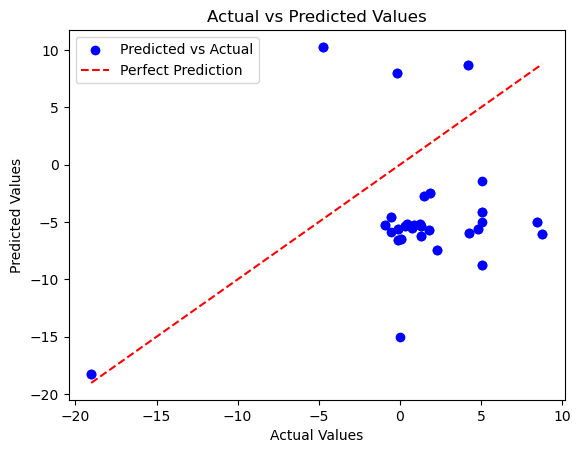

In [40]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions
# X_test, y_test, and y_pred are already defined

# Create a scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()